In [1]:
import cv2
import matplotlib.pyplot as plt

In [9]:
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kernel_ellip = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,10))
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

print(kernel_rect)
print(kernel_ellip)
print(kernel_cross)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [20]:
path = '../data/images/lena.jpg'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
thresh, binray_img = cv2.threshold(img, 125, 256, cv2.THRESH_BINARY)
dst_rect = cv2.filter2D(binray_img, -1, kernel_rect)
dst_ellip = cv2.filter2D(binray_img, -1, kernel_ellip)
dst_cross = cv2.filter2D(binray_img, -1, kernel_cross)

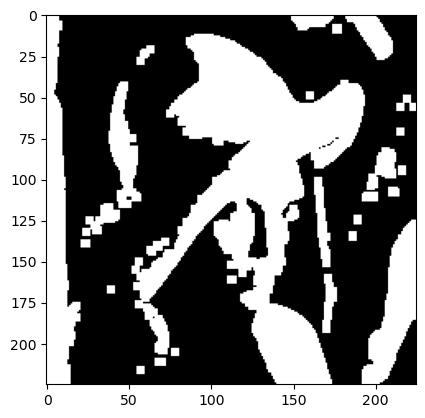

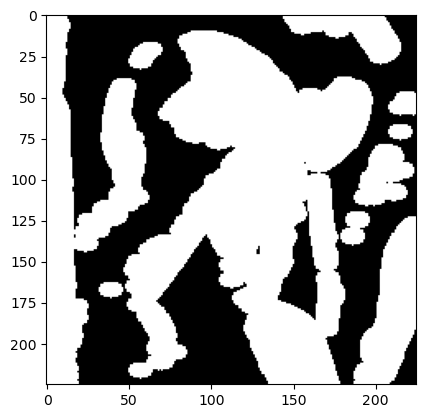

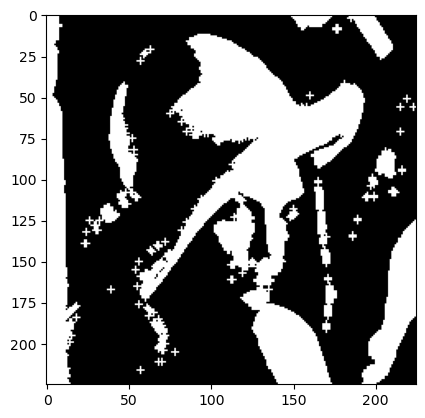

In [21]:
plt.imshow(dst_rect, cmap='gray')
plt.show()
plt.imshow(dst_ellip, cmap='gray')
plt.show()
plt.imshow(dst_cross, cmap='gray')
plt.show()

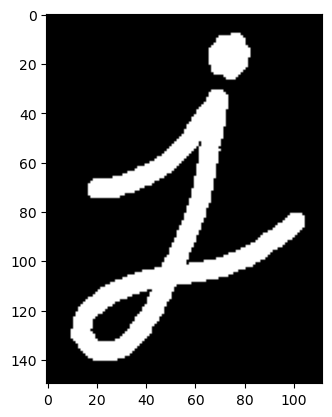

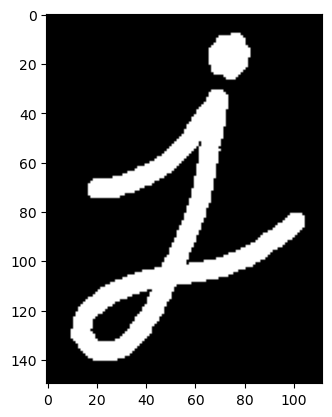

In [26]:
import numpy as np

img_ori = cv2.imread('../../DIP/OpenCV_Python_Tutorial/images/j.png', 0)
img = img_ori.copy()
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

plt.imshow(img_ori, cmap='gray')
plt.show()
plt.imshow(img, cmap='gray')
plt.show()

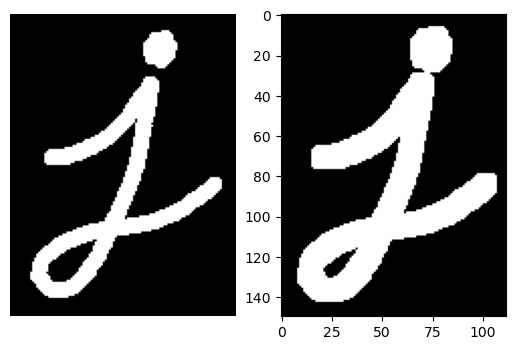

In [29]:
dilation = cv2.dilate(img, kernel,iterations = 1)
plt.subplot(121)
plt.imshow(img,cmap='gray'), plt.axis('off')
plt.subplot(122)
plt.imshow(dilation,cmap='gray')
plt.show()

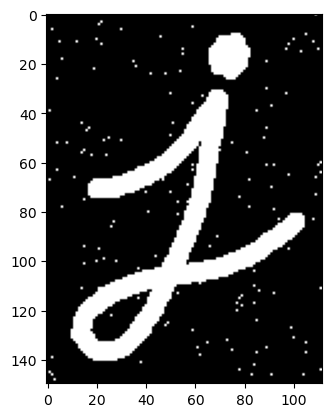

In [33]:
s_vs_p = 1 ## salt만 반영
amount = 0.01  ## 만들어진 noise중 몇퍼센트를 반영할지
img = img_ori.copy()
out = np.copy(img)

# Salt mode
num_salt = np.ceil(amount * img.size * s_vs_p)
coords = [np.random.randint(0, i, int(num_salt))
          for i in img.shape]
out[tuple(coords)] = np.max(img)

# Pepper mode
# num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
# coords = [np.random.randint(0, i, int(num_pepper))
#           for i in img.shape]
# out[tuple(coords)] = np.min(img)

plt.imshow(out, cmap='gray')
plt.show()

In [ ]:
opening = cv2.morphologyEx(out, cv2.MORPH_OPEN, kernel)